# Demo : Find pattern from data

Author: Jim Xie

Date:   2020-08-07

In [1]:
# -*- coding: utf-8 -*- 
import sys,os,time,json,random,math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def GetSinData():
    x = np.linspace(-3*math.pi,3*math.pi, 300, dtype = np.float32)
    y = np.sin(x)
    noise = np.random.normal(0, 0.25, y.shape)     
    y = y + noise
    ret = []
    for i_x,i_y in zip(x,y):
        ret.append([i_x,i_y])
    x = preprocessing.scale(x)
    ret = preprocessing.scale(ret)
    return x,ret

In [3]:
def GetHeartData():
    t = np.linspace(-math.pi, math.pi, 1000)
    x = np.sin(t)
    noise = np.random.normal(0, 0.15, x.shape)     
    #x = x + noise
    y = np.cos(t) + np.power(abs(x), 2.0/3)
    noise = np.random.normal(0, 0.15,x.shape)     
    #y = y + noise
    x = preprocessing.scale(x)
    y = preprocessing.scale(y)
    t = preprocessing.scale(t)
    ret = []
    for i_x,i_y in zip(x,y):
        ret.append([i_x,i_y])
    return t,ret

In [4]:
raw_x,raw_y = GetSinData()
raw_x,raw_y = GetHeartData()
x_data =raw_x[:, np.newaxis]  
y_data = np.array(raw_y)

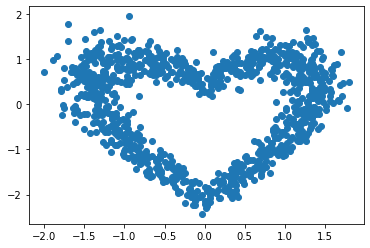

In [5]:
df = pd.DataFrame(y_data)
plt.figure()
plt.scatter(df[0],df[1])
plt.show()

In [6]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 2])

In [7]:
def Create_Input(n_hidden_count):
    dim = x.shape[1].value
    w = tf.Variable( tf.truncated_normal([dim, n_hidden_count]), name = 'w' )
    b = tf.Variable( tf.constant(0.1, shape=[n_hidden_count]), name = 'b' )
    h = tf.matmul(x, w)+b
    h = tf.nn.tanh(h)
    return h

n_hidden_cell = 10
L1 = Create_Input(n_hidden_cell)

In [8]:
def Create_Hidden(in_data,n_hidden_count):
    dim = in_data.shape[1].value
    w = tf.Variable( tf.truncated_normal([dim, n_hidden_count]), name = 'w')
    b = tf.Variable( tf.constant(0.1, shape=[n_hidden_count],name = 'b'))
    h = tf.matmul(in_data, w)+b
    h = tf.nn.tanh(h)
    return h

L2 = Create_Hidden(L1,n_hidden_cell)
L3 = Create_Hidden(L2,n_hidden_cell)
L4 = Create_Hidden(L3,n_hidden_cell)
L5 = Create_Hidden(L4,n_hidden_cell)
L6 = Create_Hidden(L5,n_hidden_cell)
L7 = Create_Hidden(L6,n_hidden_cell)
L8 = Create_Hidden(L7,n_hidden_cell)
L9 = Create_Hidden(L8,n_hidden_cell)
L10 = Create_Hidden(L9,n_hidden_cell)

In [9]:
def Create_Output(in_data):
    dim = in_data.shape[1].value
    out_dim = y.shape[1].value
    w = tf.Variable( tf.truncated_normal([dim, out_dim]), name = 'w')
    b = tf.Variable( tf.constant(1.0, shape=[out_dim], name = 'b'))
    o = tf.matmul(in_data, w)+b
    return o
prediction = Create_Output(L3)
print(x_data.shape,y_data.shape)

(1000, 1) (1000, 2)


In [10]:
loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [11]:
def ShowResult(count):
    test_x_data,test_y_data = GetSinData()
    test_x_data = test_x_data[:, np.newaxis]  
    test_y_data = np.array(test_y_data)
    test_x_data = x_data
    test_y_data = y_data
    prediction_value = sess.run(prediction, feed_dict = {x:test_x_data})
    plt.figure()
    df1 = pd.DataFrame(test_y_data)
    plt.scatter(df1[0],df1[1])
    df2 = pd.DataFrame(prediction_value)
    plt.scatter(df2[0],df2[1],c='r')
    plt.title(str(count))
    plt.show()

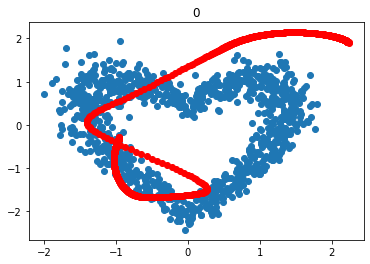

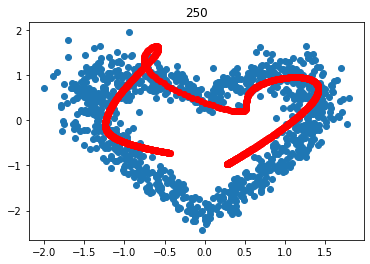

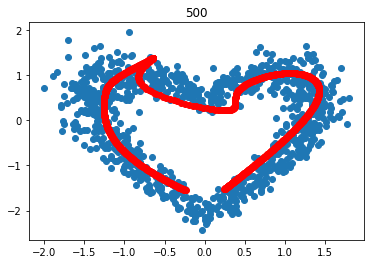

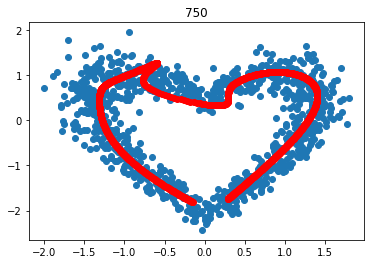

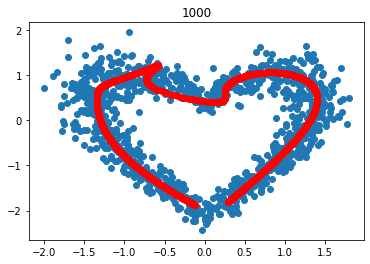

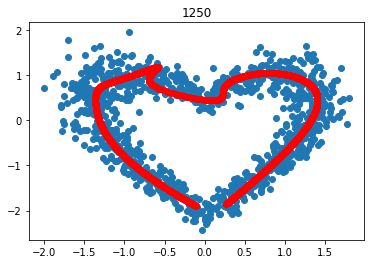

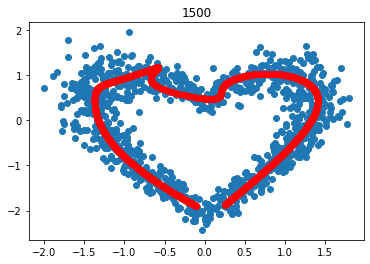

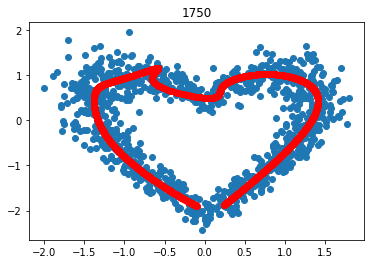

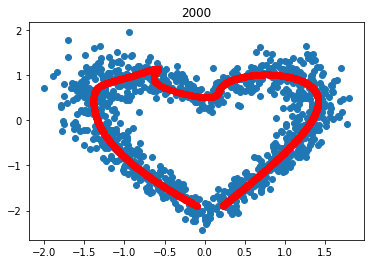

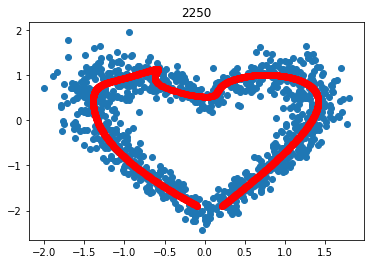

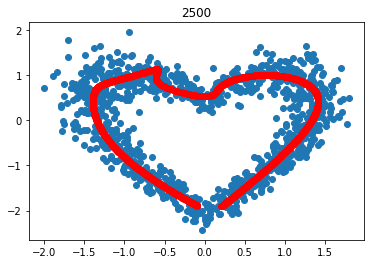

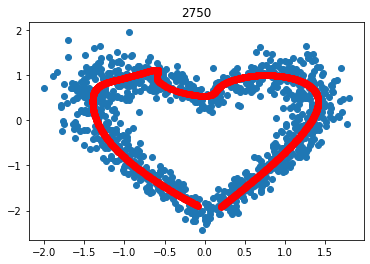

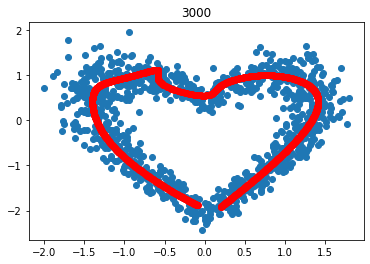

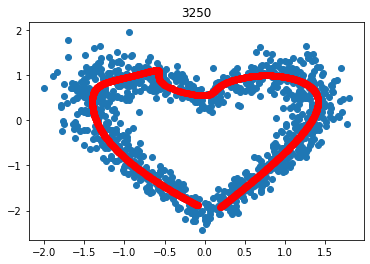

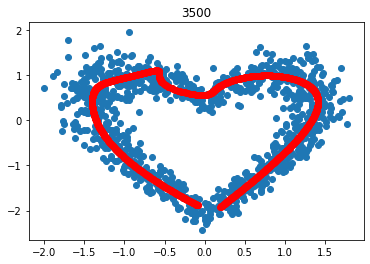

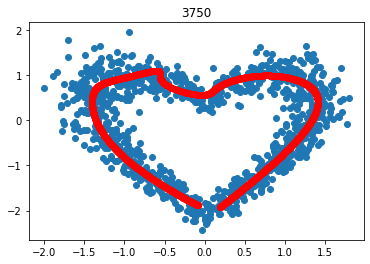

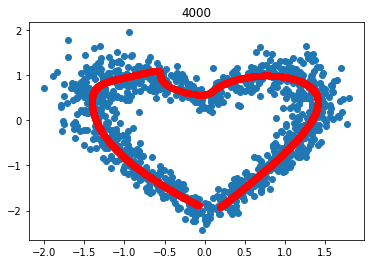

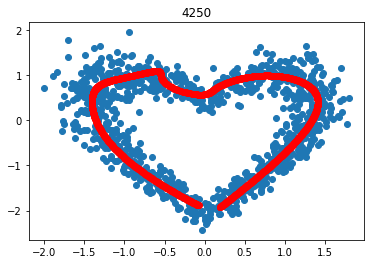

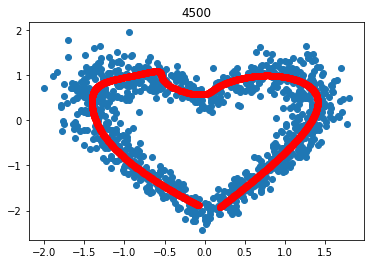

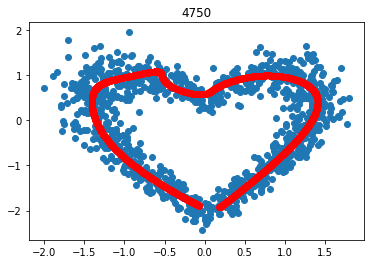

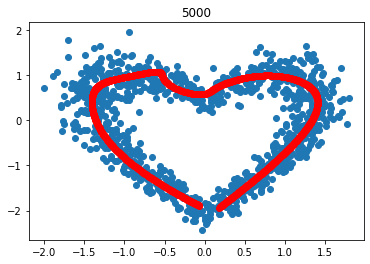

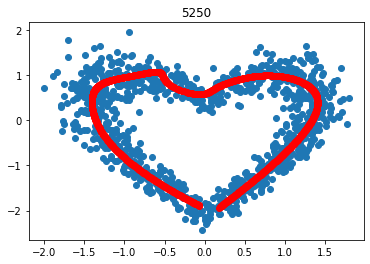

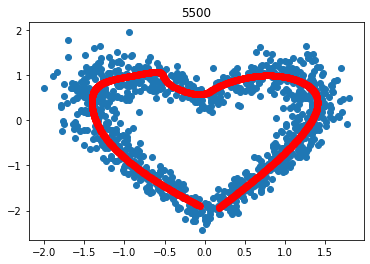

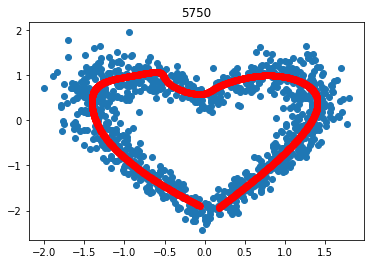

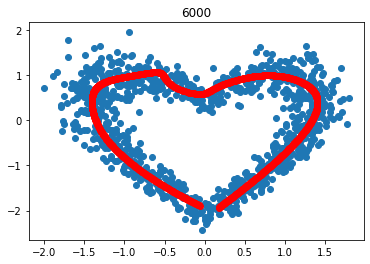

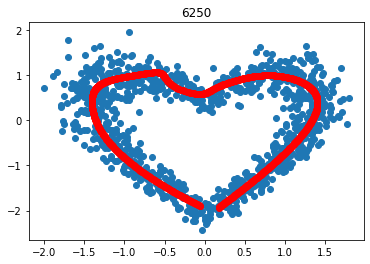

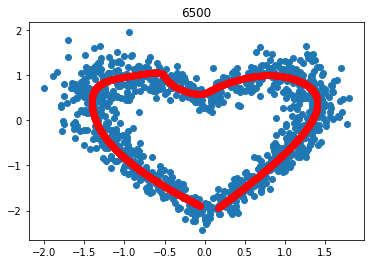

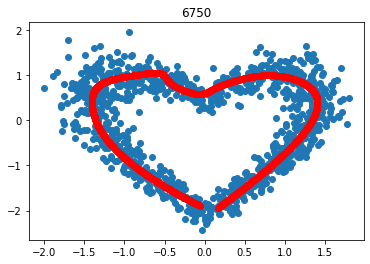

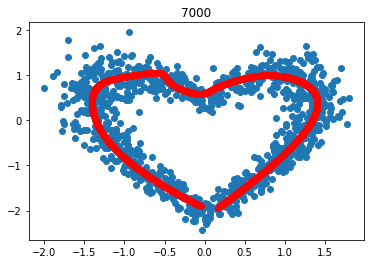

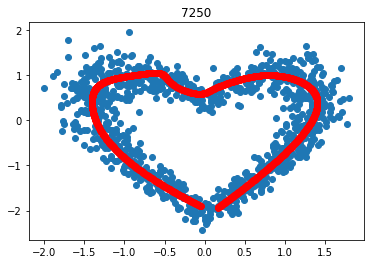

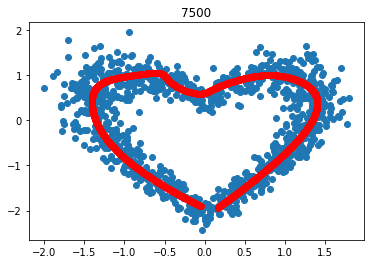

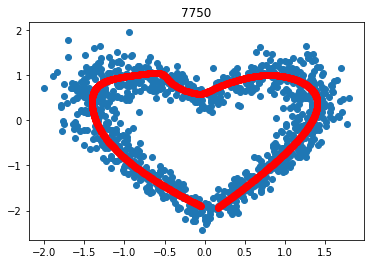

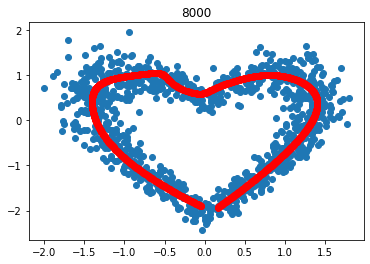

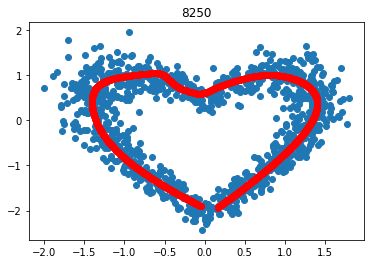

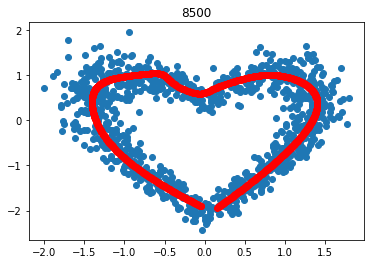

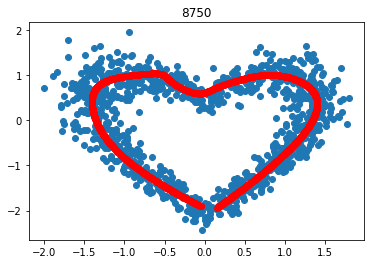

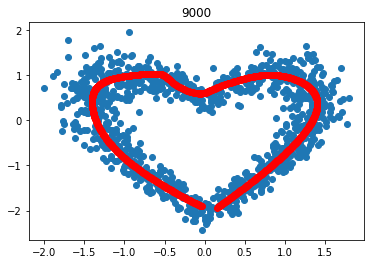

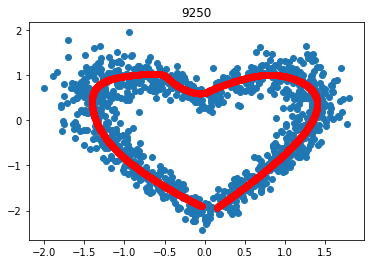

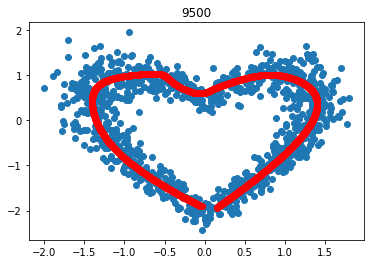

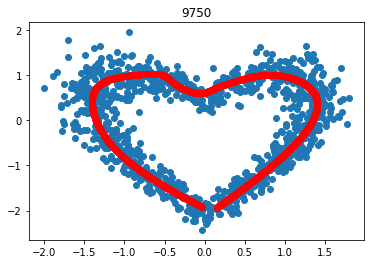

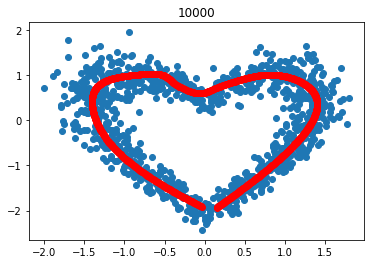

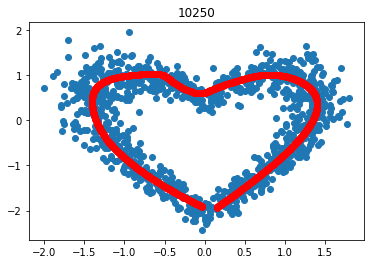

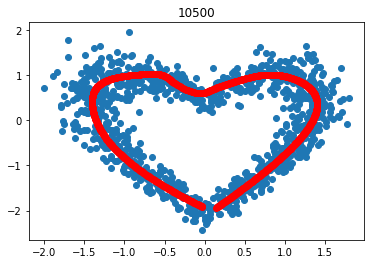

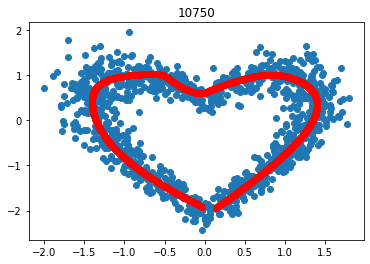

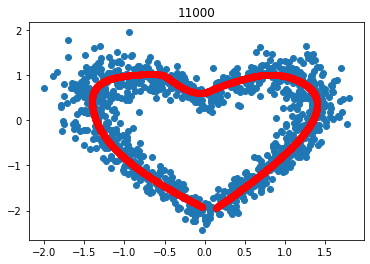

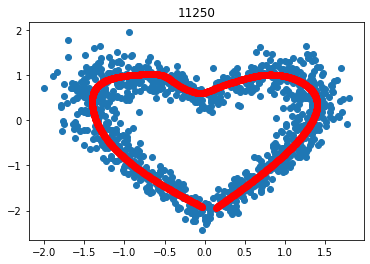

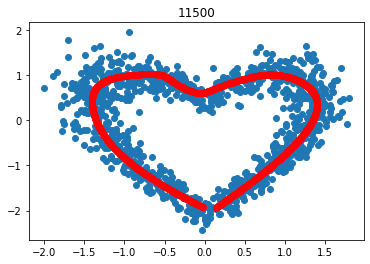

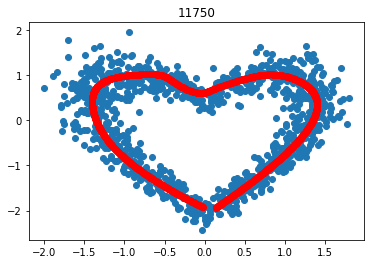

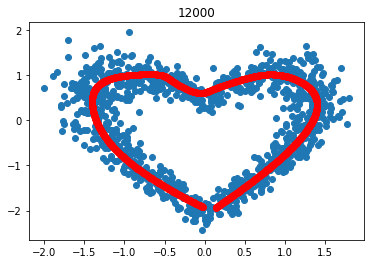

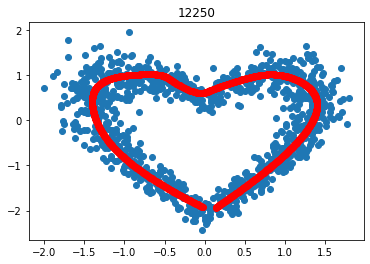

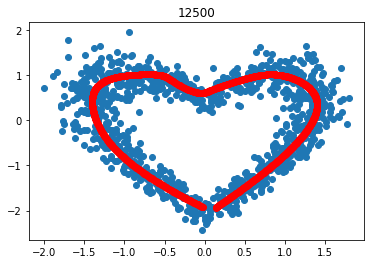

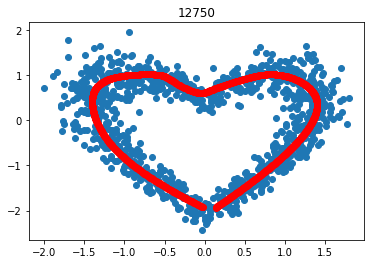

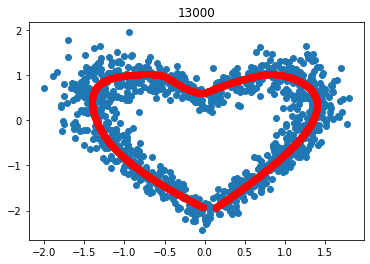

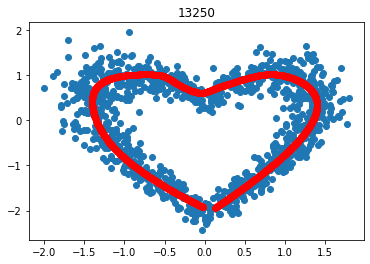

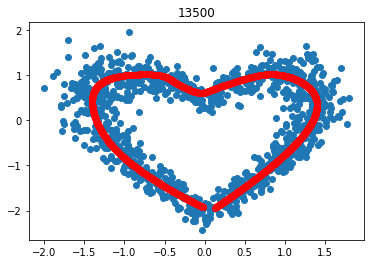

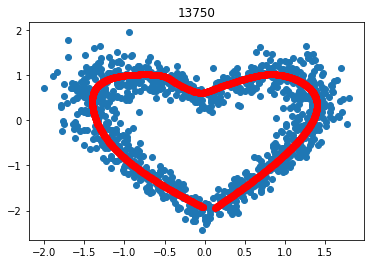

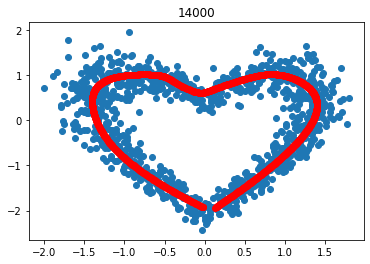

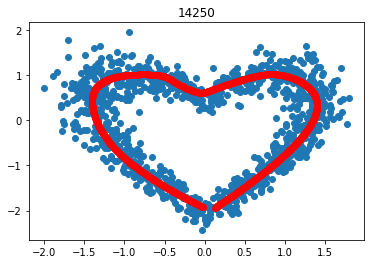

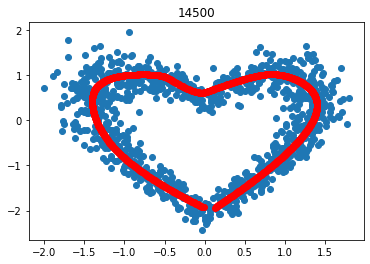

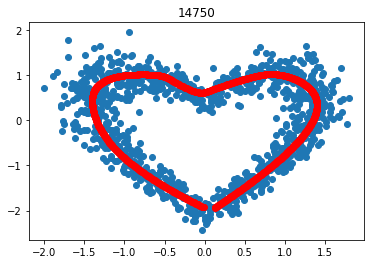

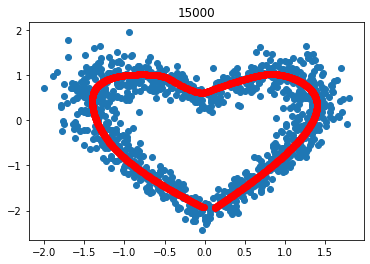

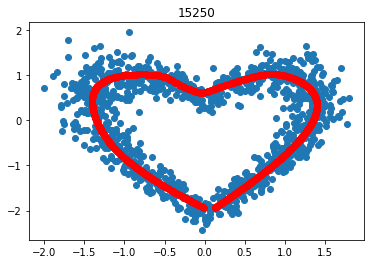

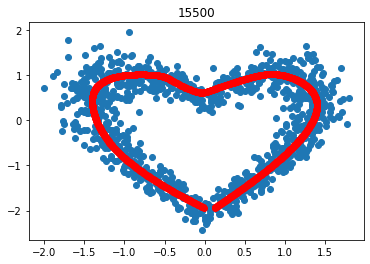

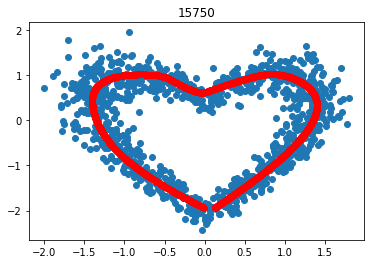

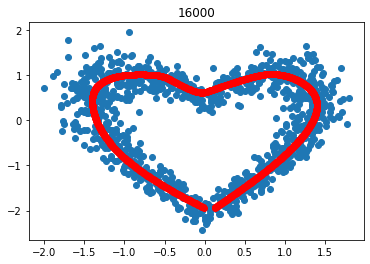

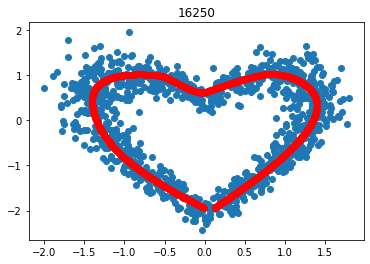

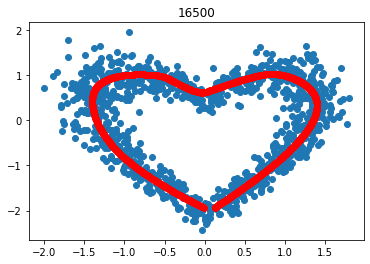

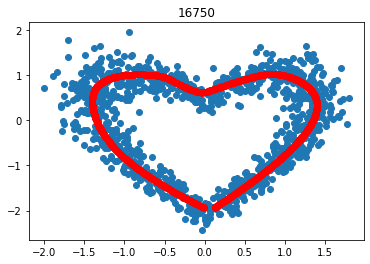

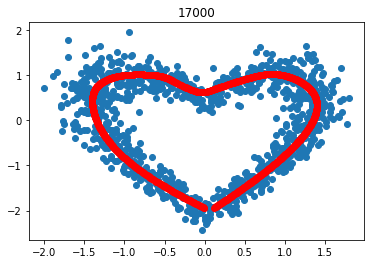

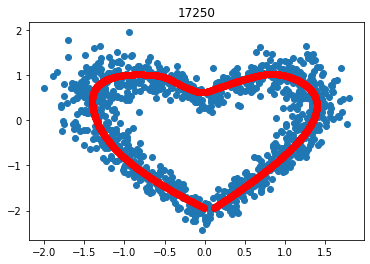

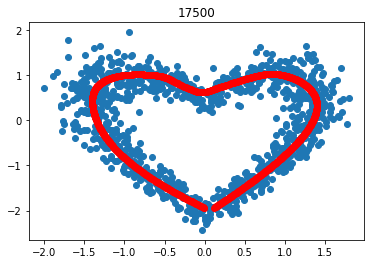

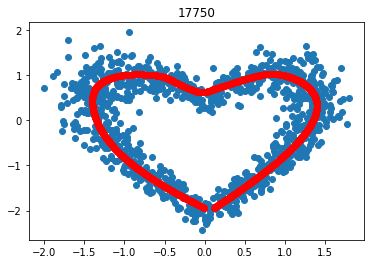

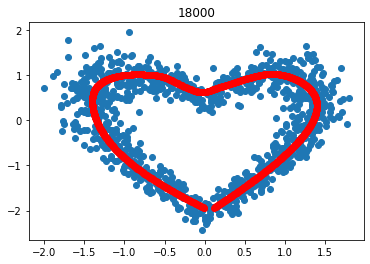

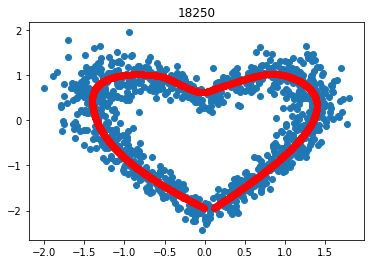

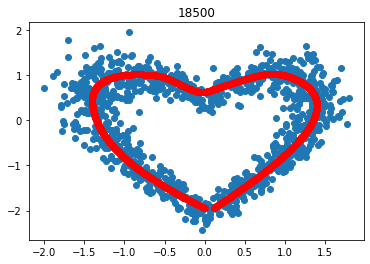

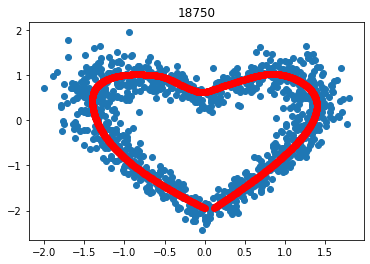

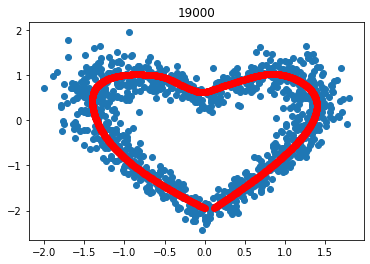

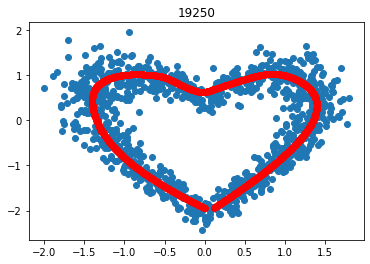

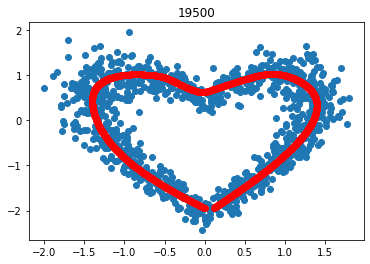

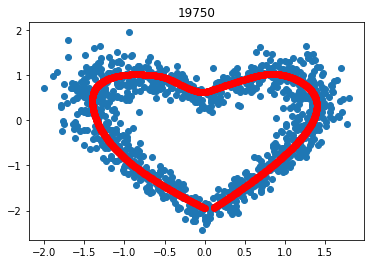

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(20000):
    sess.run(train_step, feed_dict = {x:x_data, y:y_data})
    if i % 250 == 0:
        ShowResult(i)